In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("../data/clean/building_permits_addition_alteration_clean.csv")
display(df.head(1))

,record_number,address,latitude,longitude,status,issue_date,number_of_units,current_property_use,building_cost,electrical_cost,...,planning_board_special_permit,bicycle_parking_change,issue_year,issue_month,season,calc_total_cost,total_cost_bins,original_firm_name,standardized_firm_name,keywords
0,0,"304 Vassar St, Cambridge, MA 02139",42.354803,-71.104827,Active,2020-01-07,0.0,Commercial/Mixed,310000.0,85000.0,...,False,False,2020,1,Winter,424600.0,high,Other,Other,"['repair build finishes out', 'complete interi..."


## Numerical Data Analysis

In [45]:
df_numerical = df.select_dtypes(include="number")
df_numerical

,record_number,latitude,longitude,number_of_units,building_cost,electrical_cost,plumbing_cost,gas_cost,hvac_cost,fire_prevention_cost,size_of_new_addition,issue_year,issue_month,calc_total_cost
0,0,42.354803,-71.104827,0.0,310000.0,85000.0,0.0,0.0,29600.0,0.0,0.0,2020,1,424600.0
1,1,42.390588,-71.140620,0.0,10000.0,2000.0,1000.0,0.0,0.0,3500.0,0.0,2019,12,16500.0
2,2,42.374425,-71.104437,0.0,34800.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1,34800.0
3,3,42.358092,-71.112429,3.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,8,4000.0
4,4,42.370272,-71.095866,3.0,55000.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,8,55000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11455,11873,42.364383,-71.087858,0.0,101000.0,300000.0,160000.0,0.0,25000.0,0.0,0.0,2019,11,586000.0
11456,11874,42.368296,-71.101828,0.0,3186000.0,214000.0,0.0,0.0,0.0,0.0,2770.0,2019,12,3400000.0
11457,11875,42.363788,-71.101715,0.0,9350.0,0.0,0.0,0.0,0.0,850.0,0.0,2020,1,10200.0
11458,11876,42.360474,-71.109815,2.0,24551.0,1800.0,6550.0,0.0,0.0,0.0,0.0,2019,12,32901.0


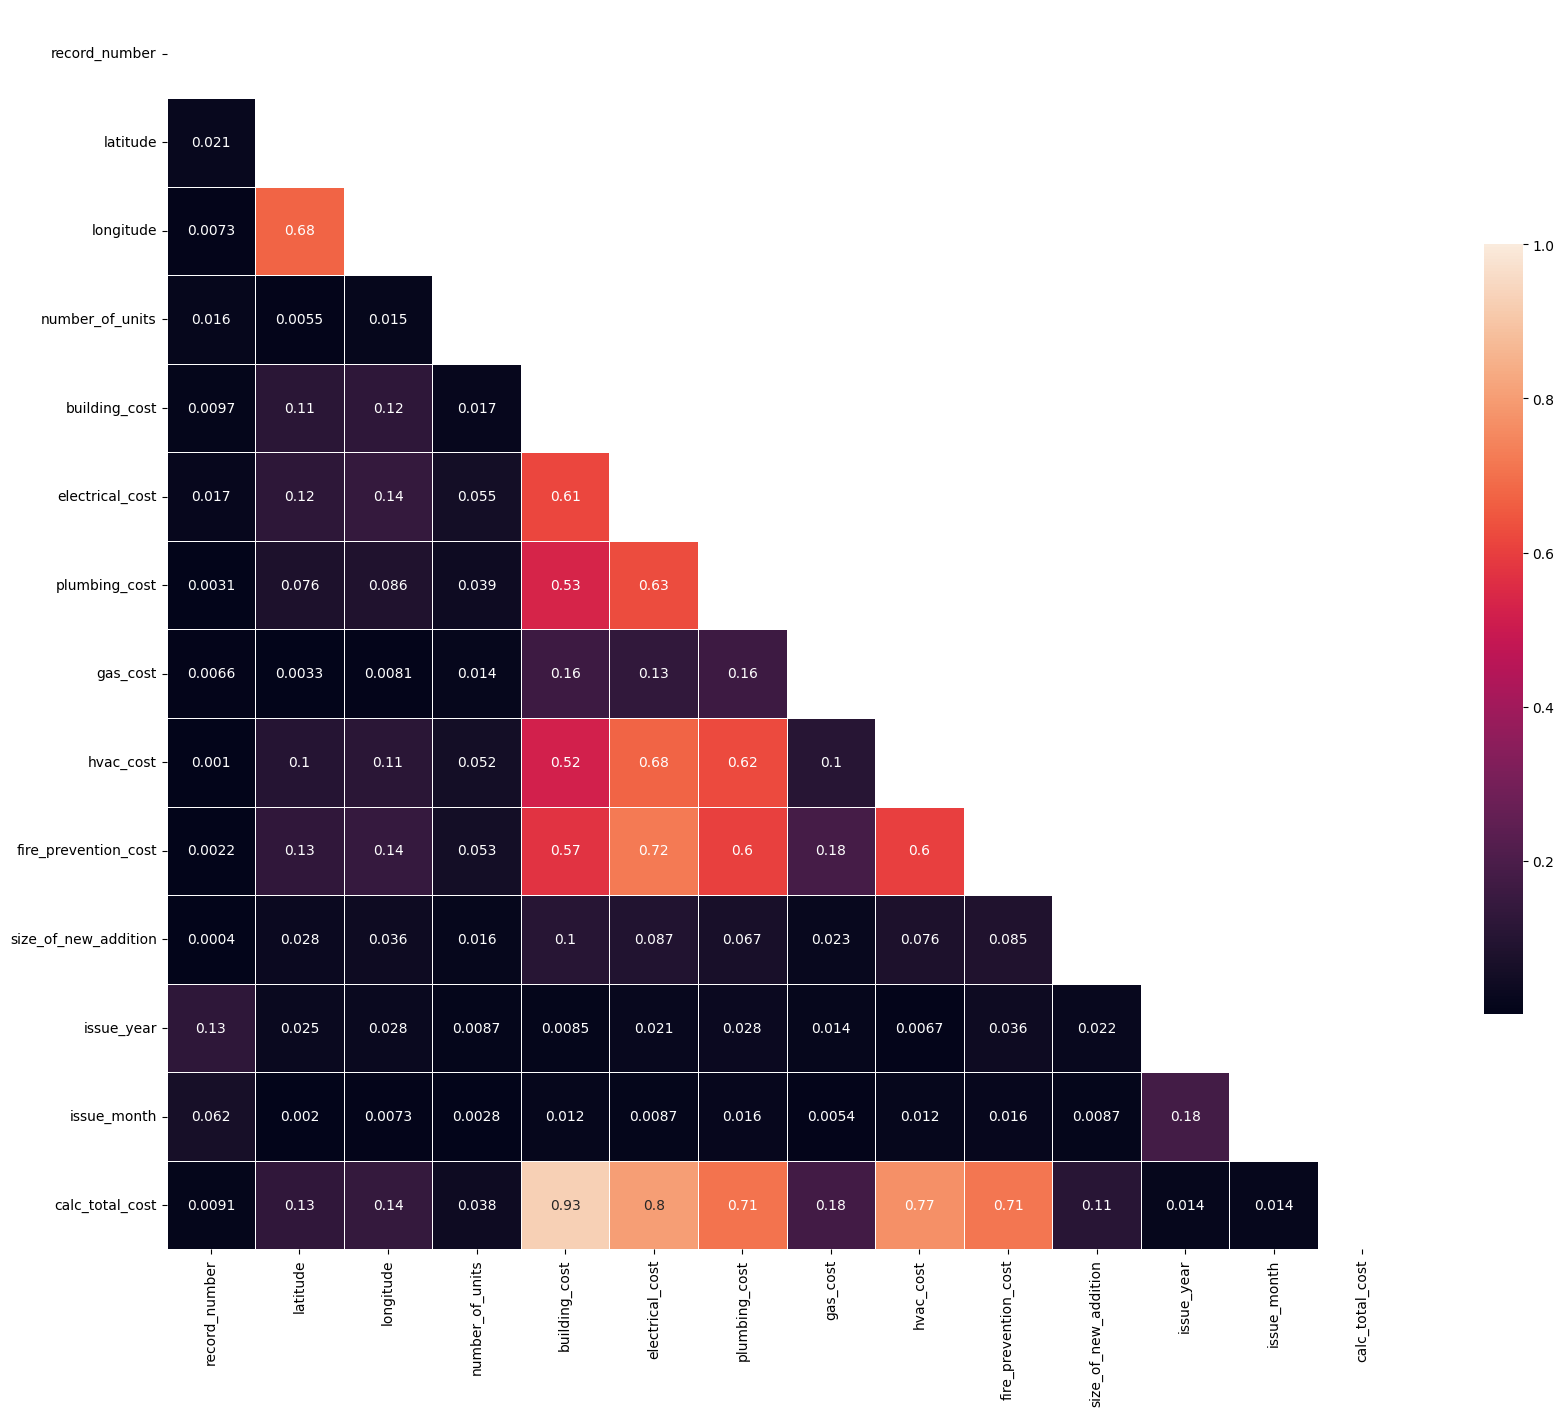

In [46]:
#creating correlation matrix

corr=np.abs(df_numerical.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Costs

In [47]:
cost_columns = [col for col in df_numerical.columns if 'cost' in col.lower()]
display(cost_columns)

['building_cost',
 'electrical_cost',
 'plumbing_cost',
 'gas_cost',
 'hvac_cost',
 'fire_prevention_cost',
 'calc_total_cost']

/Users/estebanbasili/Documents/Bootcamp/Week8/data-bootcamp-final-project/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/estebanbasili/Documents/Bootcamp/Week8/data-bootcamp-final-project/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/estebanbasili/Documents/Bootcamp/Week8/data-bootcamp-final-project/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/estebanbasili/Documents/Bootcamp/Week8/data-bootcamp-final-project/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/estebanbasili/Documents/Bootcamp/Week8/data-bootc

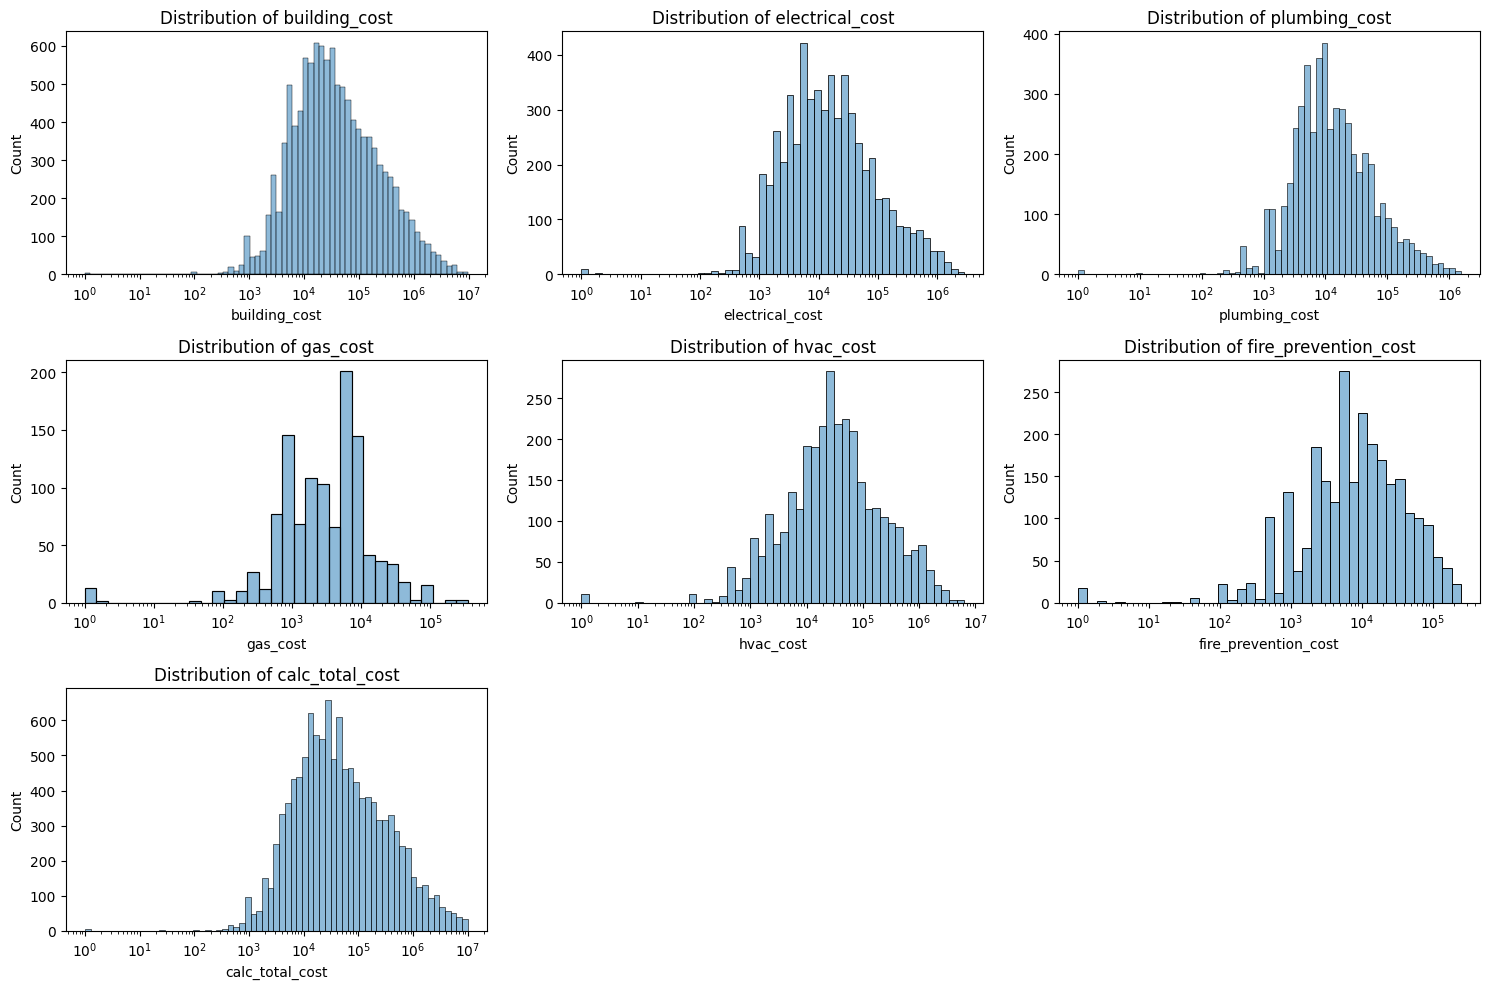

In [48]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cost_columns):
    plt.subplot(3, 3, i+1)
    # Use log scale due to likely skewness
    sns.histplot(df[col].dropna(), kde=True, log_scale=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

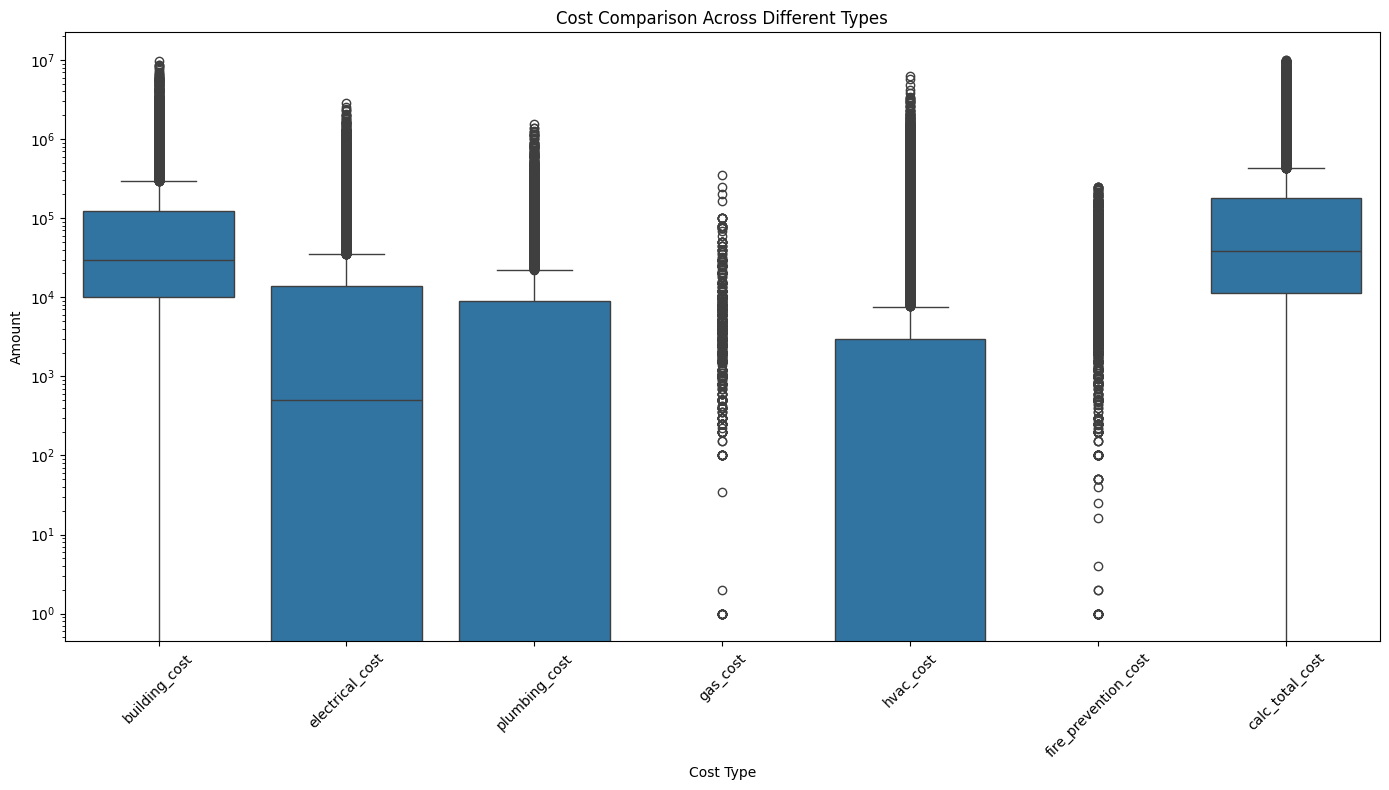

In [49]:
plt.figure(figsize=(14, 8))
# Melt the dataframe to get it in the right format for seaborn
cost_data = df[cost_columns].melt(var_name='Cost Type', value_name='Amount')
sns.boxplot(x='Cost Type', y='Amount', data=cost_data)
plt.yscale('log')  # Log scale for better visualization
plt.title('Cost Comparison Across Different Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

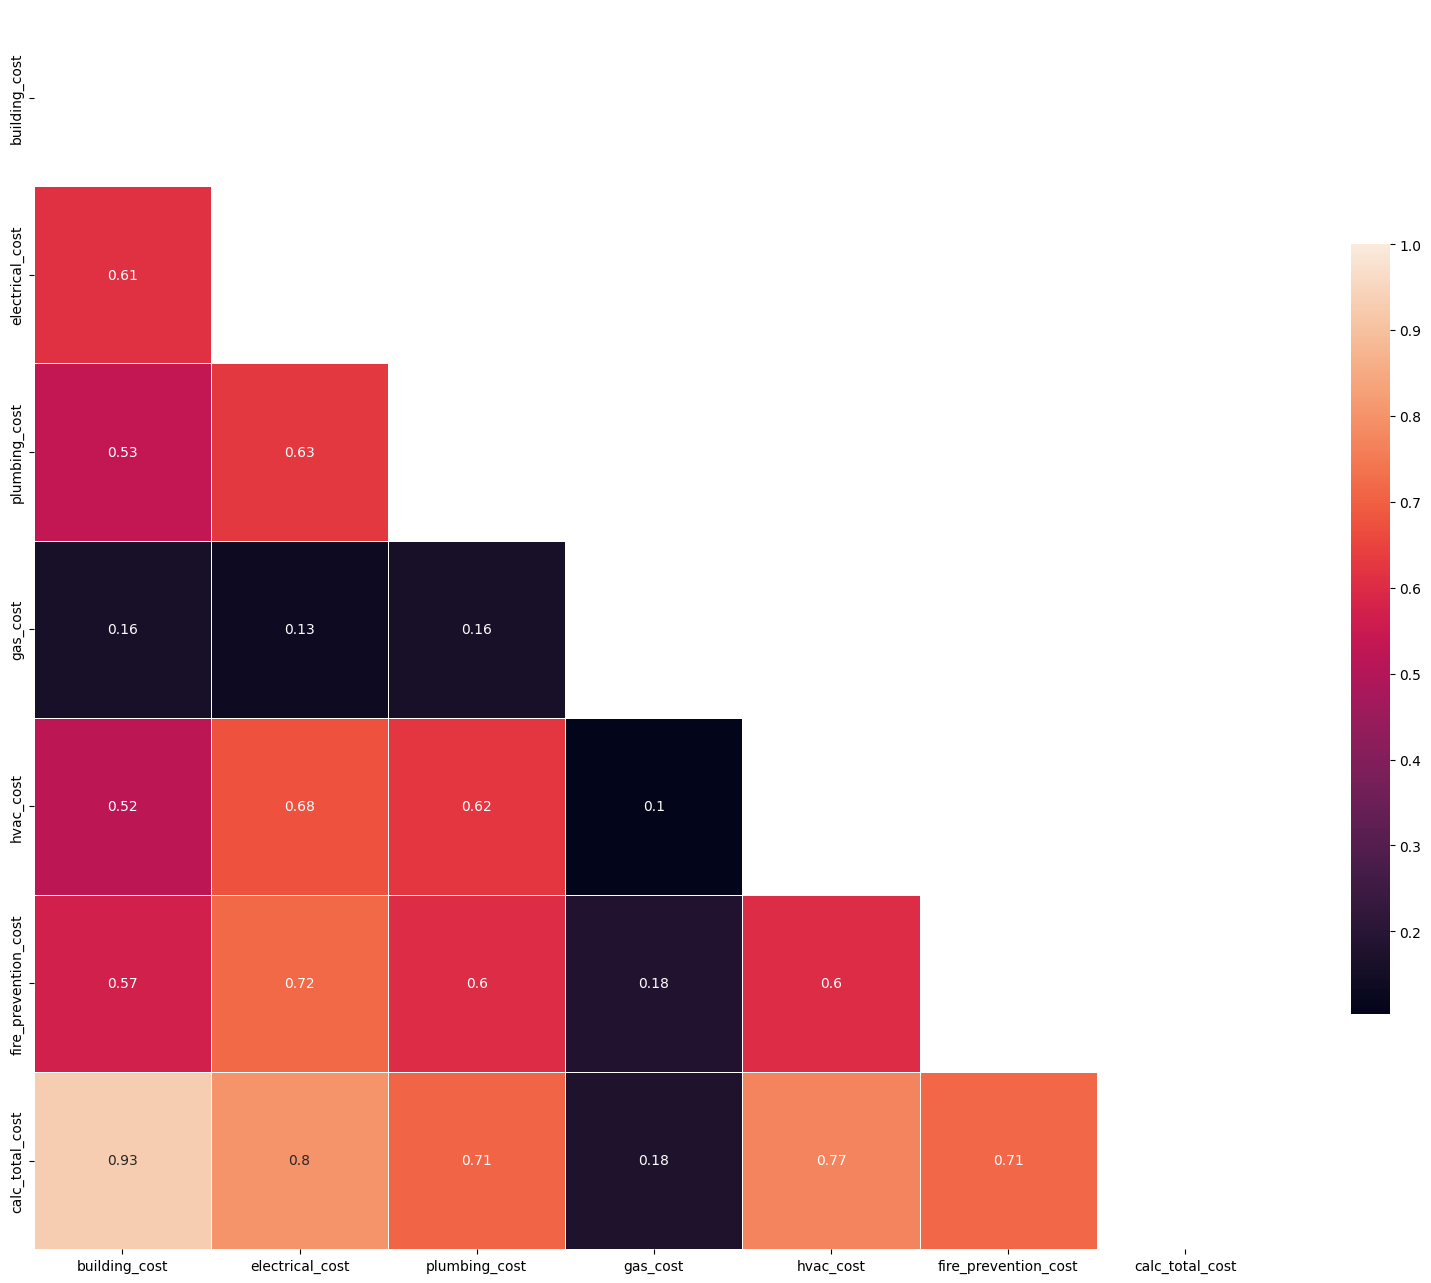

In [50]:
#creating correlation matrix

corr=np.abs(df[cost_columns].corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

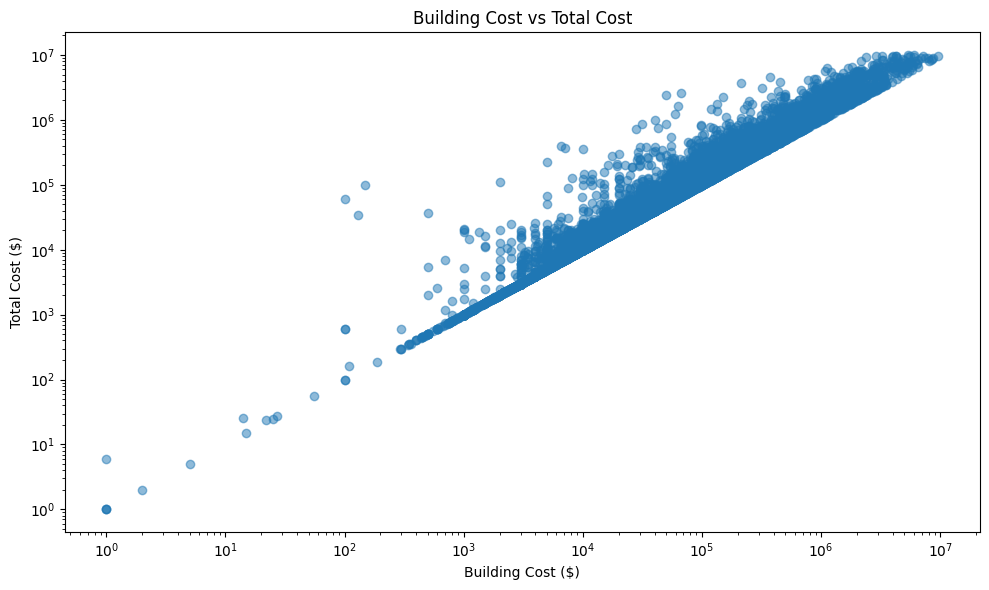

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['building_cost'], df['calc_total_cost'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Building Cost ($)')
plt.ylabel('Total Cost ($)')
plt.title('Building Cost vs Total Cost')
plt.tight_layout()
plt.show()

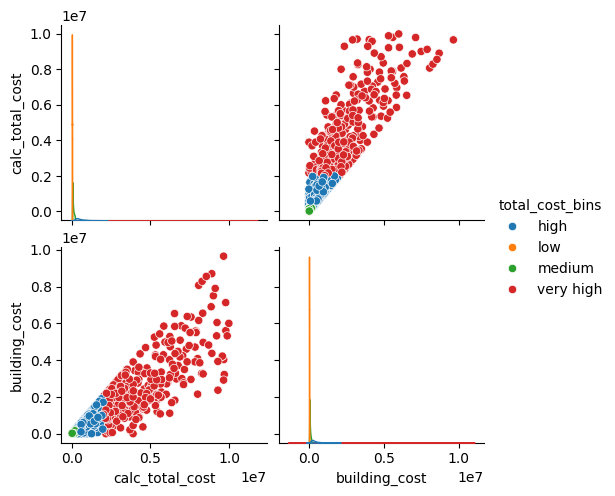

In [52]:
sns.pairplot(df[["calc_total_cost", "building_cost", "total_cost_bins"]], hue='total_cost_bins')
plt.show()

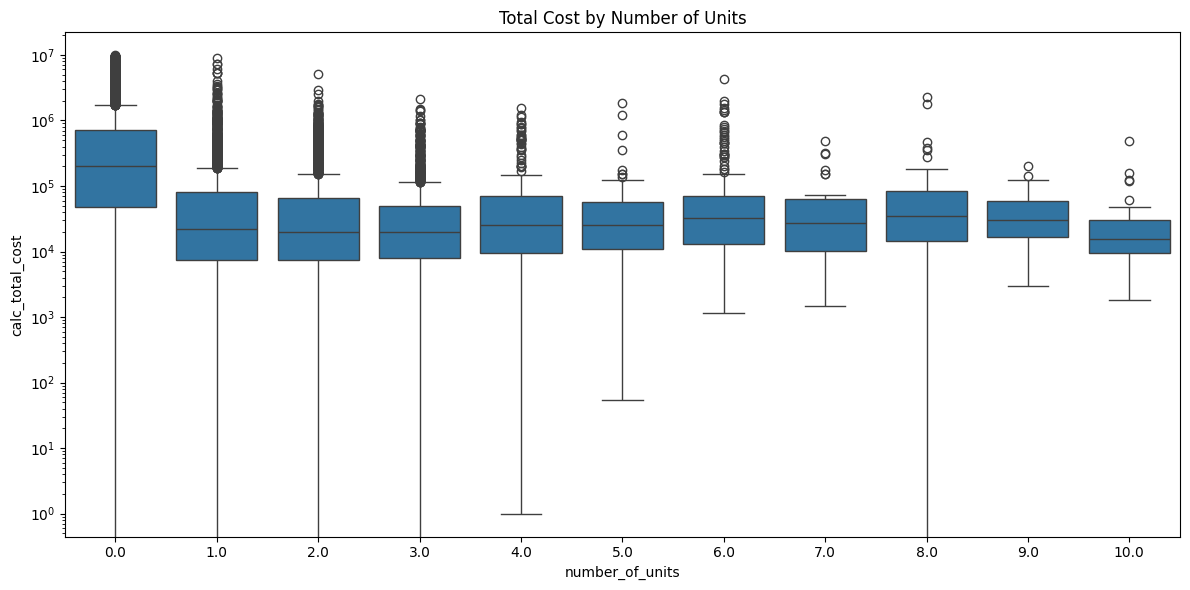

In [53]:
# Filter to reasonable number of units for visualization
units_filter = df[df['number_of_units'] <= 10]
plt.figure(figsize=(12, 6))
sns.boxplot(x='number_of_units', y='calc_total_cost', data=units_filter)
plt.title('Total Cost by Number of Units')
plt.yscale('log')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

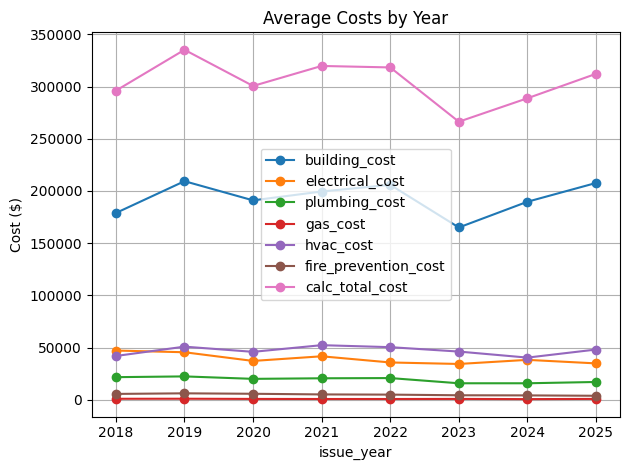

In [54]:
# Average costs by year
yearly_costs = df.groupby('issue_year')[cost_columns].mean()

plt.figure(figsize=(12, 8))
yearly_costs.plot(marker='o')
plt.title('Average Costs by Year')
plt.ylabel('Cost ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

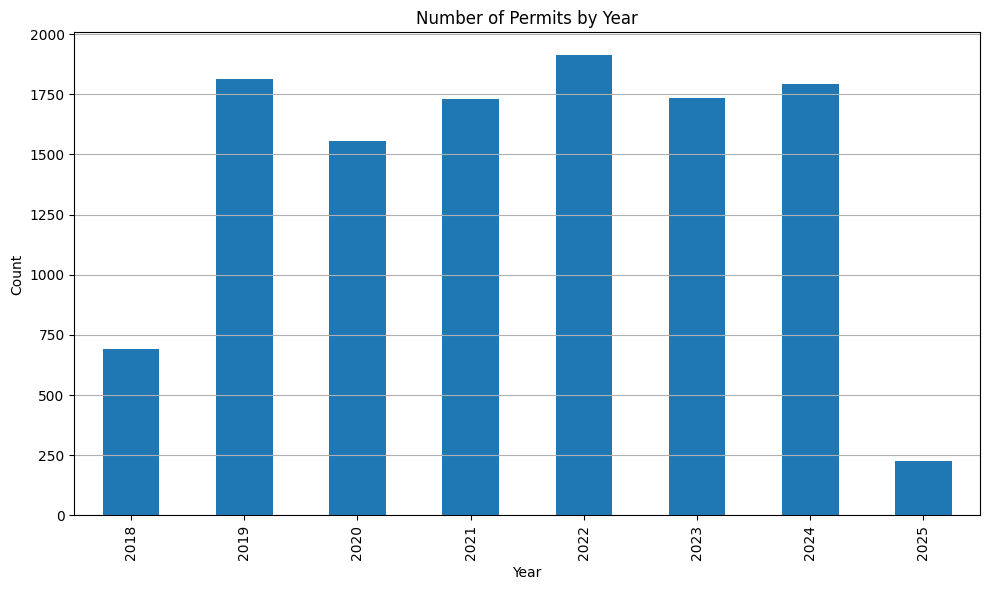

In [55]:
permits_by_year = df.groupby('issue_year').size()
    
plt.figure(figsize=(10, 6))
permits_by_year.plot(kind='bar')
plt.title('Number of Permits by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [56]:
df

,record_number,address,latitude,longitude,status,issue_date,number_of_units,current_property_use,building_cost,electrical_cost,...,planning_board_special_permit,bicycle_parking_change,issue_year,issue_month,season,calc_total_cost,total_cost_bins,original_firm_name,standardized_firm_name,keywords
0,0,"304 Vassar St, Cambridge, MA 02139",42.354803,-71.104827,Active,2020-01-07,0.0,Commercial/Mixed,310000.0,85000.0,...,False,False,2020,1,Winter,424600.0,high,Other,Other,"['repair build finishes out', 'complete interi..."
1,1,"174 Alewife Brook Pkwy, Cambridge, MA 02138",42.390588,-71.140620,Active,2019-12-23,0.0,Commercial/Mixed,10000.0,2000.0,...,False,False,2019,12,Winter,16500.0,low,TC Remodeling,TC Building Incorporated,['interior wall']
2,2,"1493 Cambridge St, Cambridge, MA 02139",42.374425,-71.104437,Active,2020-01-10,0.0,Commercial/Mixed,34800.0,0.0,...,False,False,2020,1,Winter,34800.0,medium,albert m stuart,albert m stuart,"['fire door', 'damaged door', 'fire door']"
3,3,"151 Magazine St, Cambridge, MA 02139",42.358092,-71.112429,Complete,2019-08-12,3.0,Multi-Family,4000.0,0.0,...,False,False,2019,8,Summer,4000.0,low,"Steve E. Valenti Builders, Inc",Steve E. Valenti Builders Inc.,"['replace front porch rail stair', 'porch stai..."
4,4,"292 Columbia St, Unit 2, Cambridge, MA 02141",42.370272,-71.095866,Active,2019-08-29,3.0,Multi-Family,55000.0,0.0,...,False,False,2019,8,Summer,55000.0,medium,Jason Du Construction Co.,Jason Du Construction Co.,"['kitchen renovation', 'wall finishing', 'kitc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11455,11873,"105 Broadway, Cambridge, MA 02142",42.364383,-71.087858,Active,2019-11-20,0.0,Commercial/Mixed,101000.0,300000.0,...,False,False,2019,11,Autumn,586000.0,high,"Architectural Environments, Inc.",Architectural Building & Restoration LLC,"['penthouse emergency', 'emergency generator']"
11456,11874,"377 Putnam Ave, Cambridge, Ma 02139",42.368296,-71.101828,Active,2019-12-26,0.0,Commercial/Mixed,3186000.0,214000.0,...,True,False,2019,12,Winter,3400000.0,very high,"McCourt Construction Company, Inc.",McCourt Construction Company Inc.,"['concrete foundation', 'new transformer', 'or..."
11457,11875,"9 Brookline St, Cambridge, MA 02139",42.363788,-71.101715,Active,2020-01-13,0.0,Commercial/Mixed,9350.0,0.0,...,False,False,2020,1,Winter,10200.0,low,bna,BNA CONTRACTING INC.,"['install metal stud wall', 'replace kitchen f..."
11458,11876,"99 Magazine St, Unit 1, Cambridge, MA 02139",42.360474,-71.109815,Complete,2019-12-10,2.0,One/Two-Family,24551.0,1800.0,...,False,False,2019,12,Winter,32901.0,medium,"Gilman, Guidelli & Bellow",Gilman Guidelli & Bellow Co. Inc.,"['exist bathroom', 'new plumbing fixture', 'lo..."


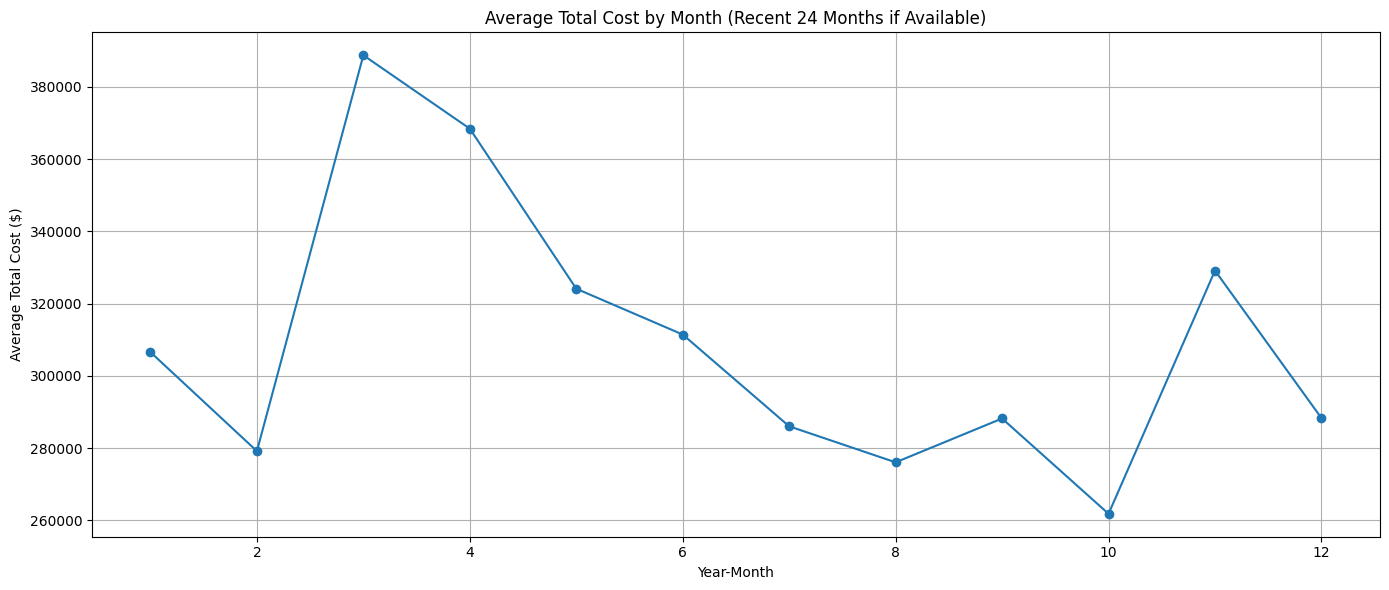

In [57]:
# Monthly average costs (last 24 months if data spans multiple years)
monthly_costs = df.groupby('issue_month')['calc_total_cost'].mean()#.tail(24)

plt.figure(figsize=(14, 6))
monthly_costs.plot(kind='line', marker='o')
plt.title('Average Total Cost by Month (Recent 24 Months if Available)')
plt.xlabel('Year-Month')
plt.ylabel('Average Total Cost ($)')
plt.grid(True)
# plt.xticks(rotation=45)
plt.tight_layout()


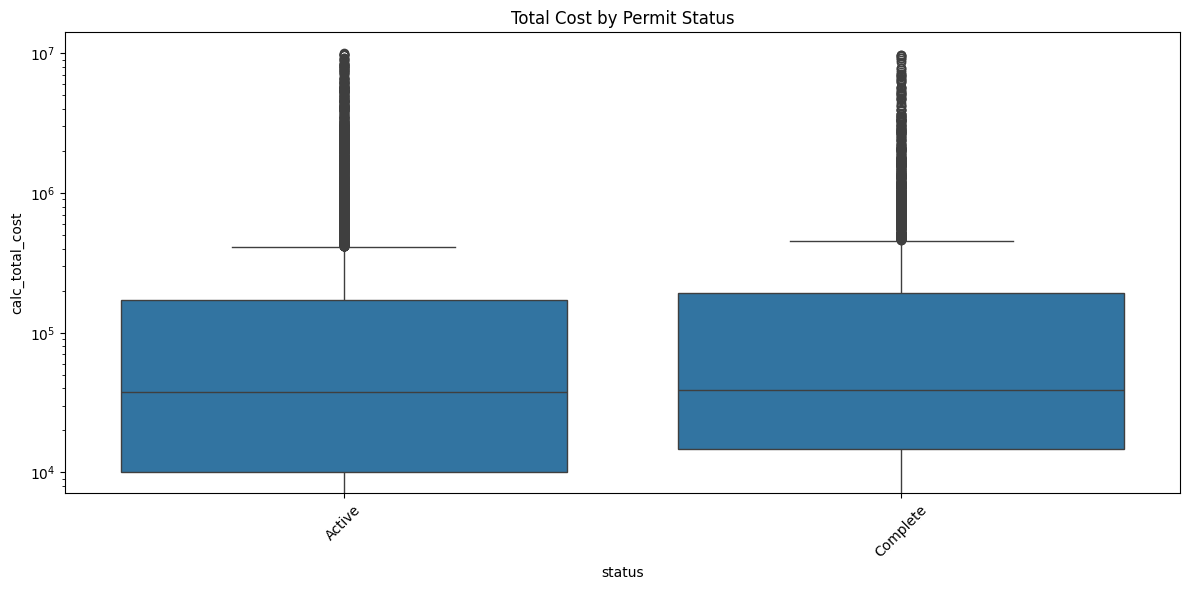

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='calc_total_cost', data=df)
plt.title('Total Cost by Permit Status')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

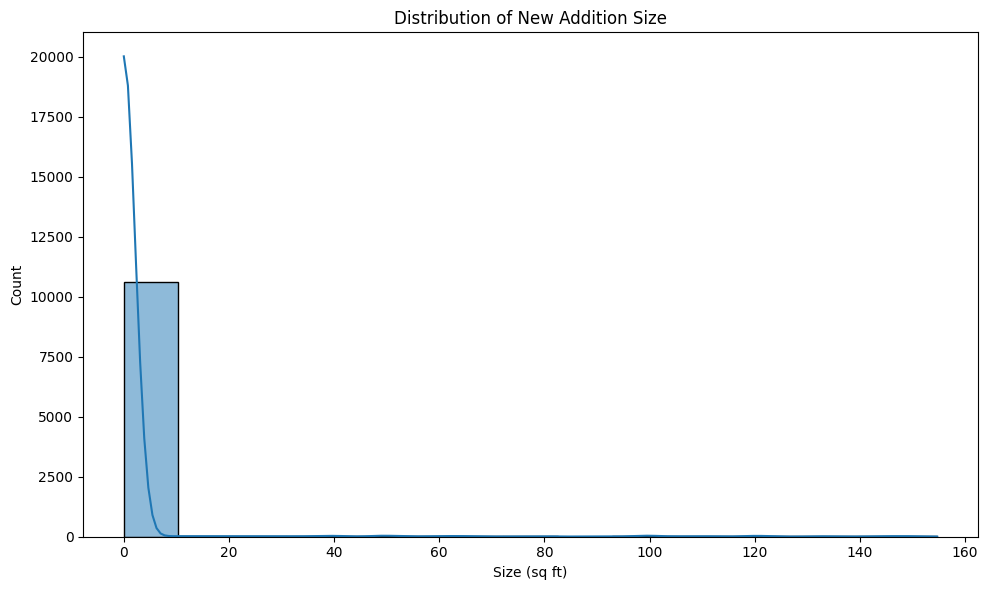

In [59]:
plt.figure(figsize=(10, 6))
# Filter out extreme outliers for better visualization
size_data = df[df['size_of_new_addition'] <= df['size_of_new_addition'].quantile(0.95)]
sns.histplot(size_data['size_of_new_addition'].dropna(), kde=True)
plt.title('Distribution of New Addition Size')
plt.xlabel('Size (sq ft)')
plt.tight_layout()
plt.show()

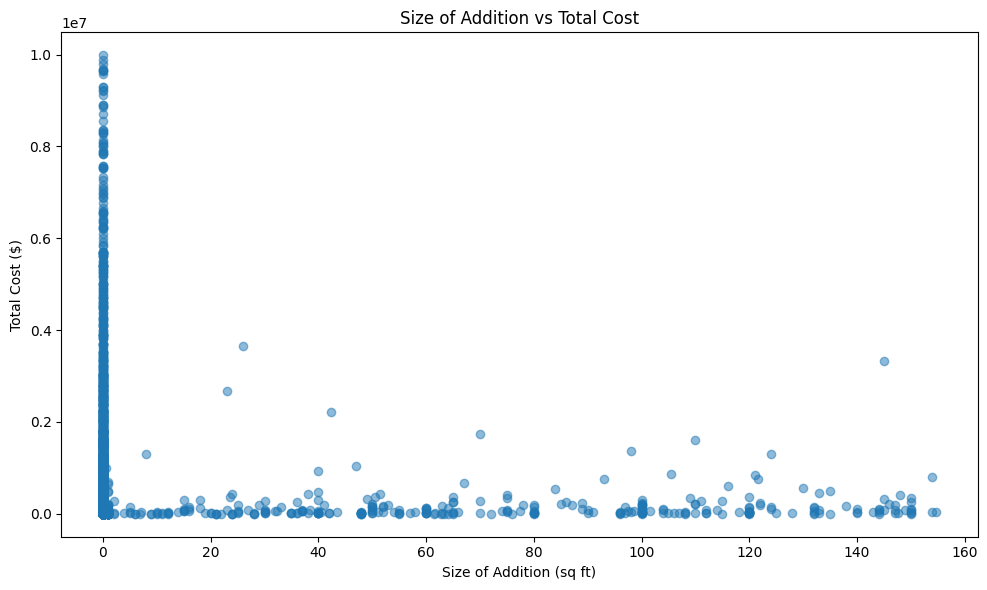

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(size_data['size_of_new_addition'], size_data['calc_total_cost'], alpha=0.5)
plt.title('Size of Addition vs Total Cost')
plt.xlabel('Size of Addition (sq ft)')
plt.ylabel('Total Cost ($)')
plt.tight_layout()
plt.show()

## Categorical Data Analysis

In [61]:
columns = df.select_dtypes(exclude="number").columns

for column in columns:
    if df[column][0] != False:
        print("Column:", column, "| Unique Values:", df[column].nunique())
        display(df[column].unique())
        print("-------------------------")

Column: address | Unique Values: 7619


array(['304 Vassar St, Cambridge, MA 02139',
       '174 Alewife Brook Pkwy, Cambridge, MA 02138',
       '1493 Cambridge St, Cambridge, MA 02139', ...,
       '9 Brookline St, Cambridge, MA 02139',
       '99 Magazine St, Unit 1, Cambridge, MA 02139',
       '431 Putnam Ave, Cambridge, MA 02139'], shape=(7619,), dtype=object)

-------------------------
Column: status | Unique Values: 2


array(['Active', 'Complete'], dtype=object)

-------------------------
Column: issue_date | Unique Values: 1533


array(['2020-01-07', '2019-12-23', '2020-01-10', ..., '2019-09-13',
       '2019-12-09', '2019-08-02'], shape=(1533,), dtype=object)

-------------------------
Column: current_property_use | Unique Values: 4


array(['Commercial/Mixed', 'Multi-Family', 'Townhouse', 'One/Two-Family'],
      dtype=object)

-------------------------
Column: description | Unique Values: 10447


array(['Complete interior and limited exterior renovations to existing 3,400 s.f., 1-story masonry building including interior build-out, finishes, lighting, mechanical, roofing and masonry repair.',
       'demo of interior walls / carpet / tile and ACT',
       'Replacement or 7-fire door due to damaged doors and hardware',
       ...,
       'install a metal stud wall wityh 5/8 fire code for repair of hood vent, replace kitchen floor',
       'Renovate existing bathroom. New plumbing fixtures, same locations. New tile, paint through out. No change in footprint.',
       'Replace railings and 2 columns on 1st floor front porch to existing dimensions. New railing will be 36" high'],
      shape=(10447,), dtype=object)

-------------------------
Column: isd_description | Unique Values: 9543


array(['Interior Renovation - partial first and second floors (no exterior work)',
       'Demolition of interior walls and finishes',
       'Replace (7) fire rated doors with like-kind rating', ...,
       "Foundations for new transformers; fencing greater than 7'",
       'Install a metal stud wall with 5/8 fire code for repair of hood vent, replace kitchen floor',
       'Replace railings and 2 columns on 1st floor front porch to existing dimensions. New railing will be 36" high'],
      shape=(9543,), dtype=object)

-------------------------
Column: change_in_at_least_half_of_total_area | Unique Values: 2


array([ True, False])

-------------------------
Column: firm_name | Unique Values: 4256


array(['Other', 'TC Remodeling', 'albert m stuart', ...,
       'Longden Company Inc', 'McCourt Construction Company Inc.', 'bna'],
      shape=(4256,), dtype=object)

-------------------------
Column: debris_disposal | Unique Values: 4597


array(['Stoughton Recycling', 'waste manamgent by Hammer demo',
       'albert m stuart', ..., 'Generator to be re-purposed elsewhere',
       'Statewide Demo. James Grant, Hyde Park',
       'Everett Transfer Station'], shape=(4597,), dtype=object)

-------------------------
Column: description_of_demolition | Unique Values: 6967


array(['Floor demo with no HVAC or plumbing, minor electrical demo',
       'demo interior walls \xa0and some carpet /tiles and act,',
       'Removing old doors', ..., 'remove floor',
       'Demo existing walk in shower and bathroom tile through out bathroom.',
       'Temp shoring. Remove railing and posts on 1st floor deck'],
      shape=(6967,), dtype=object)

-------------------------
Column: method_of_removal | Unique Values: 5


array(['Daily Removal', 'Dumpster', 'Minimal', 'Other', 'Container'],
      dtype=object)

-------------------------
Column: type_of_demolition | Unique Values: 5


array(['Minor interior demolition in work area only',
       'Exterior demolition in work area only.', 'No demolition required',
       'Substantial work area demolition or complete interior demolition.',
       'Substantial demolition of any structural element or demolition of more than 25% of existing building.'],
      dtype=object)

-------------------------
Column: building_use | Unique Values: 4


array(['Commercial/Mixed', 'Multi-Family', 'One/Two-Family', 'Townhouse'],
      dtype=object)

-------------------------
Column: building_construction_type | Unique Values: 3


array(['Steel/Concrete, Non-Combustible (Type I/II)', 'Wood (Type (IV/V)',
       'Masonry / Wood (Type III)'], dtype=object)

-------------------------
Column: season | Unique Values: 4


array(['Winter', 'Summer', 'Autumn', 'Spring'], dtype=object)

-------------------------
Column: total_cost_bins | Unique Values: 4


array(['high', 'low', 'medium', 'very high'], dtype=object)

-------------------------
Column: original_firm_name | Unique Values: 4340


array(['Other', 'TC Remodeling', 'albert m stuart', ...,
       'Longden Company, Inc', 'McCourt Construction Company, Inc.',
       'bna'], shape=(4340,), dtype=object)

-------------------------
Column: standardized_firm_name | Unique Values: 2154


array(['Other', 'TC Building Incorporated', 'albert m stuart', ...,
       'Colonetti Exterior Construction', 'Longden Company Inc',
       'McCourt Construction Company Inc.'], shape=(2154,), dtype=object)

-------------------------
Column: keywords | Unique Values: 9353


array(["['repair build finishes out', 'complete interior', 'limited exterior renovation', 'story masonry', 'masonry building', 'masonry repair']",
       "['interior wall']", "['fire door', 'damaged door', 'fire door']",
       ...,
       "['install metal stud wall', 'replace kitchen floor', 'metal wall', '5/8 fire code', 'hood vent', 'hood vent']",
       "['exist bathroom', 'new plumbing fixture', 'location', 'new tile', 'change']",
       "['replace columns railings', '2 columns', '1st floor', '1st floor', 'porch', 'exist dimension', 'new railing']"],
      shape=(9353,), dtype=object)

-------------------------


### status

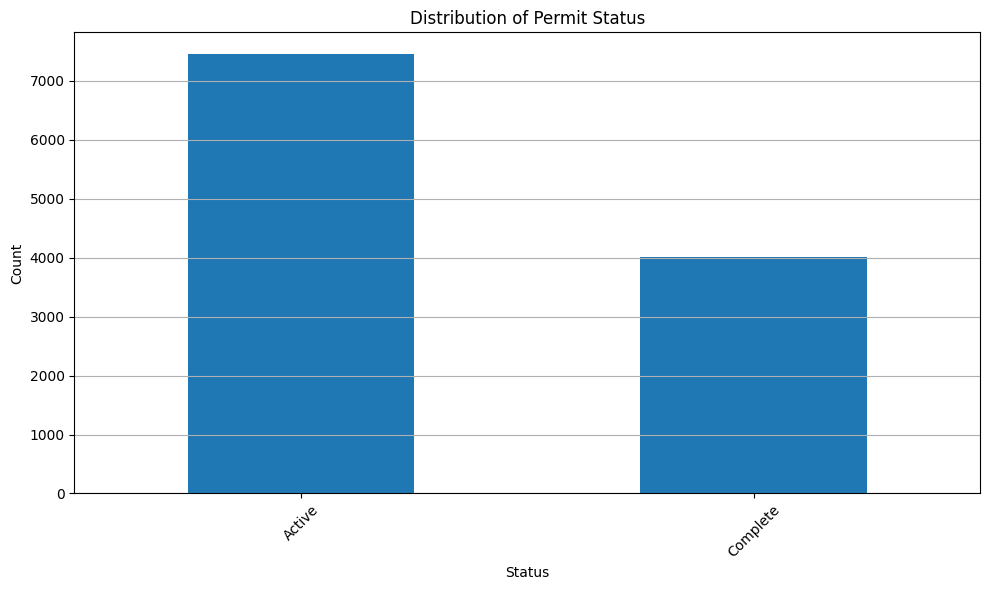

In [62]:
plt.figure(figsize=(10, 6))
status_counts = df['status'].value_counts()
status_counts.plot(kind='bar')
plt.title('Distribution of Permit Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### building_use

In [63]:
df.groupby(["building_use"]).agg(n=('record_number', 'count'), total_cost_avg=("building_cost", "max")) \
    # .sort_values(by='record_number', ascending=False)



,n,total_cost_avg
building_use,,
Commercial/Mixed,3152,9651226.0
Multi-Family,3027,6000000.0
One/Two-Family,4919,7500000.0
Townhouse,362,3900600.0


In [64]:
df \
    .groupby(["current_property_use"]) \
    .agg('count') \
    # .sort_values(by='current_property_use', ascending=False)

,record_number,address,latitude,longitude,status,issue_date,number_of_units,building_cost,electrical_cost,plumbing_cost,...,planning_board_special_permit,bicycle_parking_change,issue_year,issue_month,season,calc_total_cost,total_cost_bins,original_firm_name,standardized_firm_name,keywords
current_property_use,,,,,,,,,,,,,,,,,,,,,
Commercial/Mixed,3166,3166,3166,3166,3166,3166,3166,3166,3166,3166,...,3166,3166,3166,3166,3166,3166,3166,3166,3166,3166
Multi-Family,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,...,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
One/Two-Family,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998,...,4998,4998,4998,4998,4998,4998,4998,4998,4998,4998
Townhouse,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357


In [65]:
df \
    .groupby(["current_property_use", "building_use"]) \
    .agg('count') \
    .sort_values(by='current_property_use', ascending=False)

record_number  address  latitude  \
current_property_use building_use                                         
Townhouse            Commercial/Mixed              1        1         1   
                     Multi-Family                 24       24        24   
                     One/Two-Family               35       35        35   
                     Townhouse                   297      297       297   
One/Two-Family       Commercial/Mixed              2        2         2   
                     Multi-Family                 96       96        96   
                     One/Two-Family             4849     4849      4849   
                     Townhouse                    51       51        51   
Multi-Family         Commercial/Mixed              4        4         4   
                     Multi-Family               2890     2890      2890   
                     One/Two-Family               31       31        31   
                     Townhouse                    14       14        14   
Commercial/Mixed     Commercial/Mixed           3145     3145      3145   
                     Multi-Family                 17       17        17   
                     One/Two-Family                4        4         4   

                                       longitude  status  issue_date  \
current_property_use building_use                                      
Townhouse            Commercial/Mixed          1       1           1   
                     Multi-Family             24      24          24   
                     One/Two-Family           35      35          35   
                     Townhouse               297     297         297   
One/Two-Family       Commercial/Mixed          2       2           2   
                     Multi-Family             96      96          96   
                     One/Two-Family         4849    4849        4849   
                     Townhouse                51      51          51   
Multi-Family         Commercial/Mixed          4       4           4   
                     Multi-Family           2890    2890        2890   
                     One/Two-Family           31      31          31   
                     Townhouse                14      14          14   
Commercial/Mixed     Commercial/Mixed       3145    3145        3145   
                     Multi-Family             17      17          17   
                     One/Two-Family            4       4           4   

                                       number_of_units  building_cost  \
current_property_use building_use                                       
Townhouse            Commercial/Mixed                1              1   
                     Multi-Family                   24             24   
                     One/Two-Family                 35             35   
                     Townhouse                     297            297   
One/Two-Family       Commercial/Mixed                2              2   
                     Multi-Family                   96             96   
                     One/Two-Family               4849           4849   
                     Townhouse                      51             51   
Multi-Family         Commercial/Mixed                4              4   
                     Multi-Family                 2890           2890   
                     One/Two-Family                 31             31   
                     Townhouse                      14             14   
Commercial/Mixed     Commercial/Mixed             3145           3145   
                     Multi-Family                   17             17   
                     One/Two-Family                  4              4   

                                       electrical_cost  plumbing_cost  ...  \
current_property_use building_use                                      ...   
Townhouse            Commercial/Mixed                1              1  ...   
                     Multi-Family                   24        

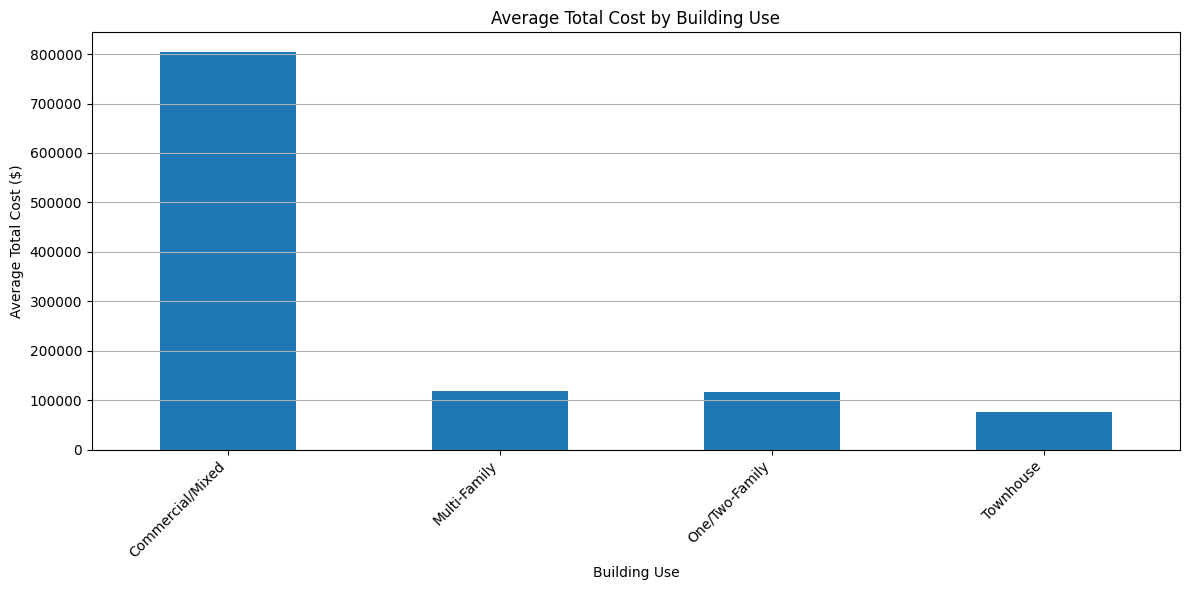

In [66]:
avg_cost_by_use = df.groupby('building_use')['calc_total_cost'].mean().sort_values(ascending=False)
    
plt.figure(figsize=(12, 6))
avg_cost_by_use.plot(kind='bar')
plt.title('Average Total Cost by Building Use')
plt.xlabel('Building Use')
plt.ylabel('Average Total Cost ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### boolean cases

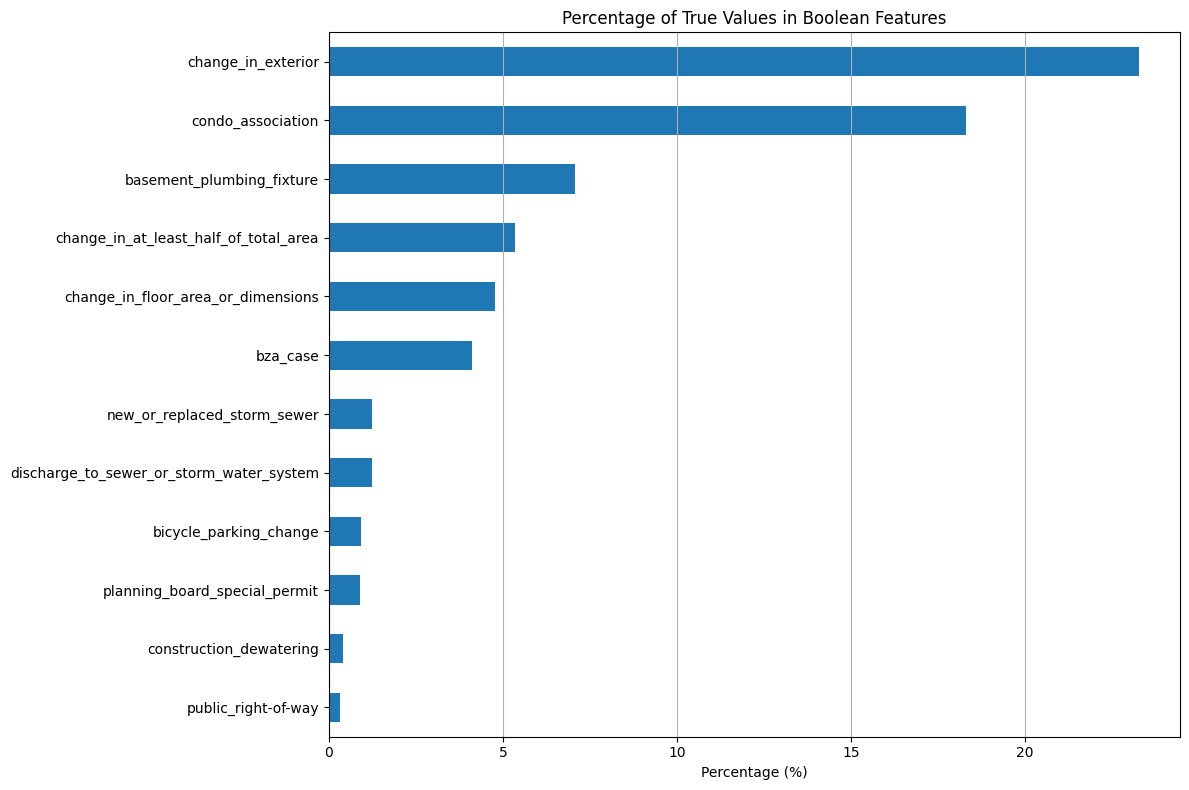

In [67]:
boolean_columns = df.select_dtypes(include=['bool']).columns

# Calculate percentage of True values for each boolean column
bool_percentages = df[boolean_columns].mean() * 100

plt.figure(figsize=(12, 8))
bool_percentages.sort_values().plot(kind='barh')
plt.title('Percentage of True Values in Boolean Features')
plt.xlabel('Percentage (%)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

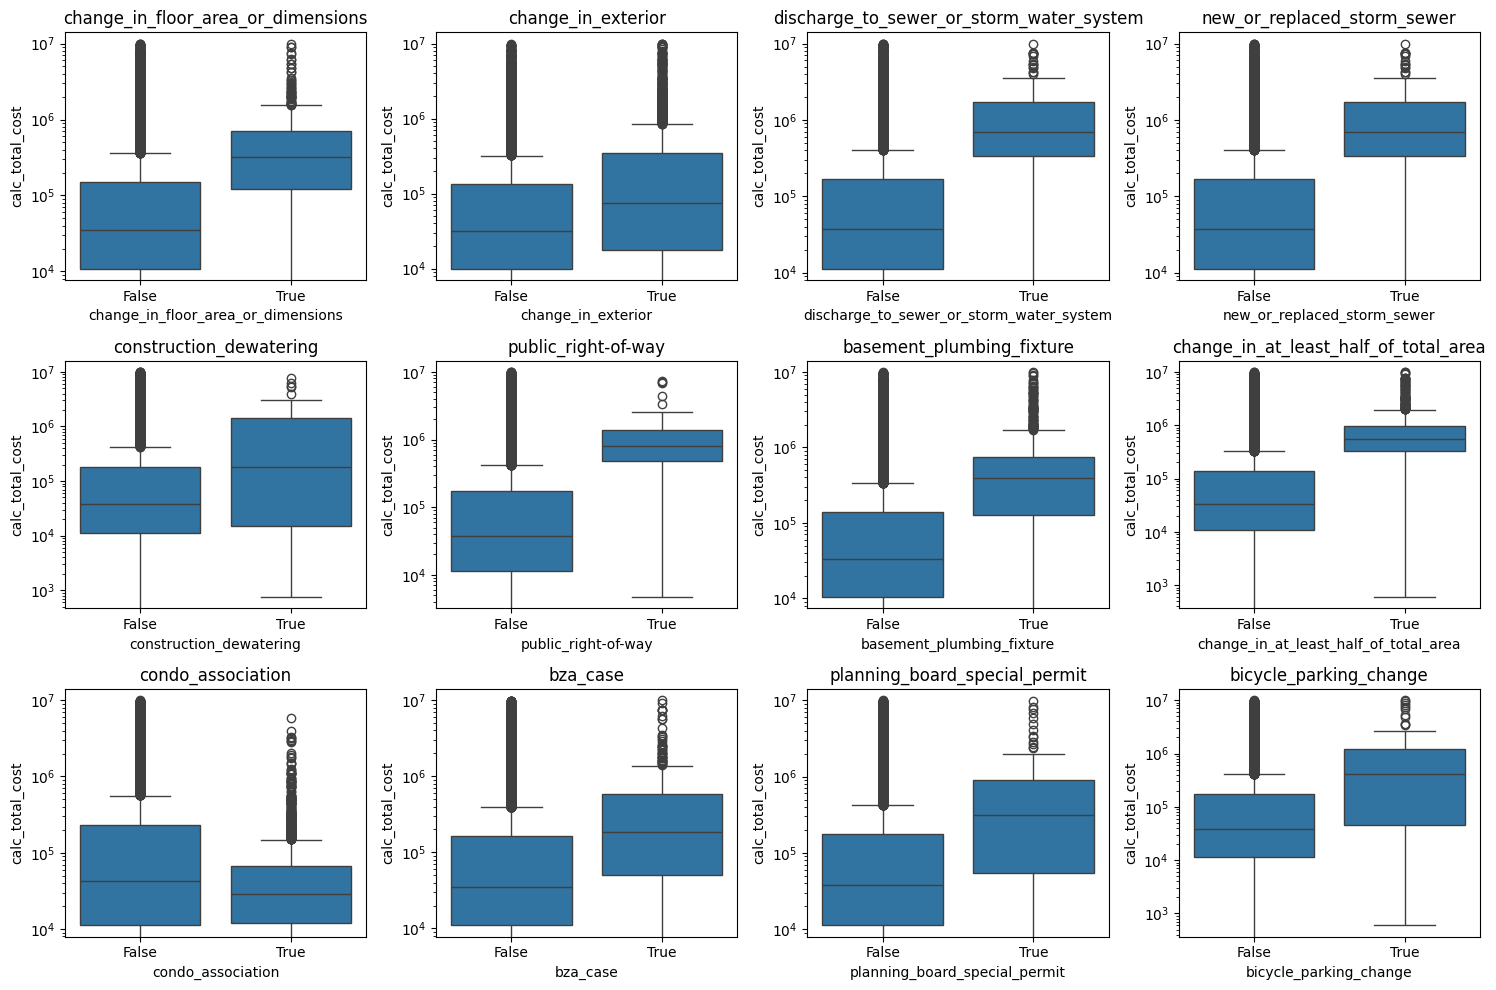

In [68]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(boolean_columns):
        plt.subplot(3, 4, i+1)
        sns.boxplot(x=col, y='calc_total_cost', data=df)
        plt.title(f'{col}')
        plt.yscale('log')
plt.tight_layout()
plt.show()

### building_construction_types

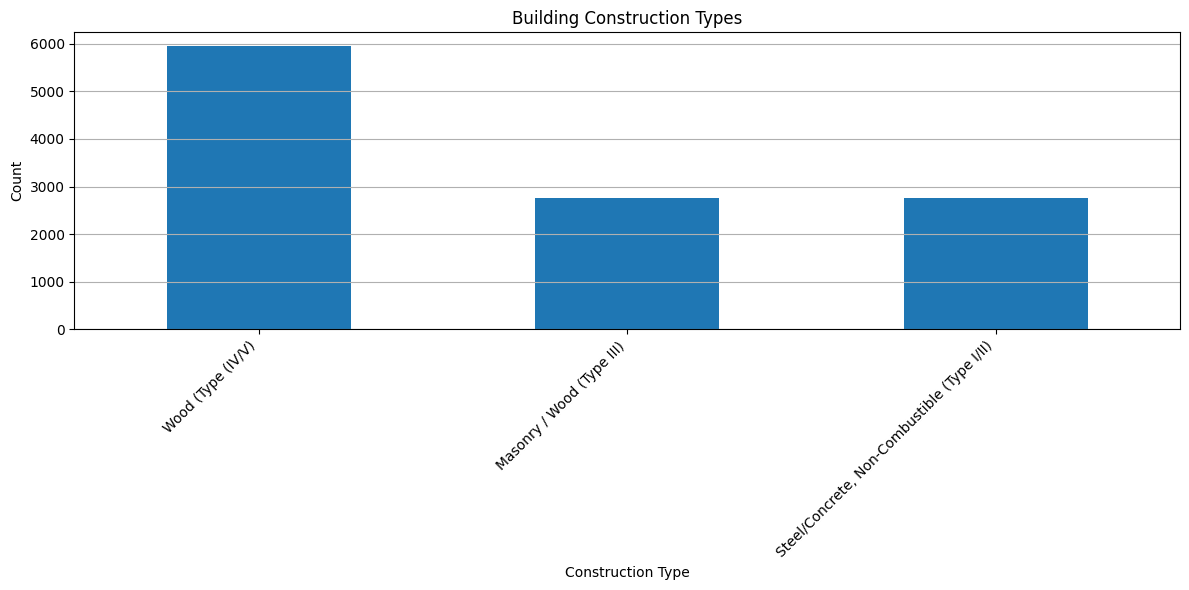

In [69]:
type_counts = df['building_construction_type'].value_counts()
    
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Building Construction Types')
plt.xlabel('Construction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

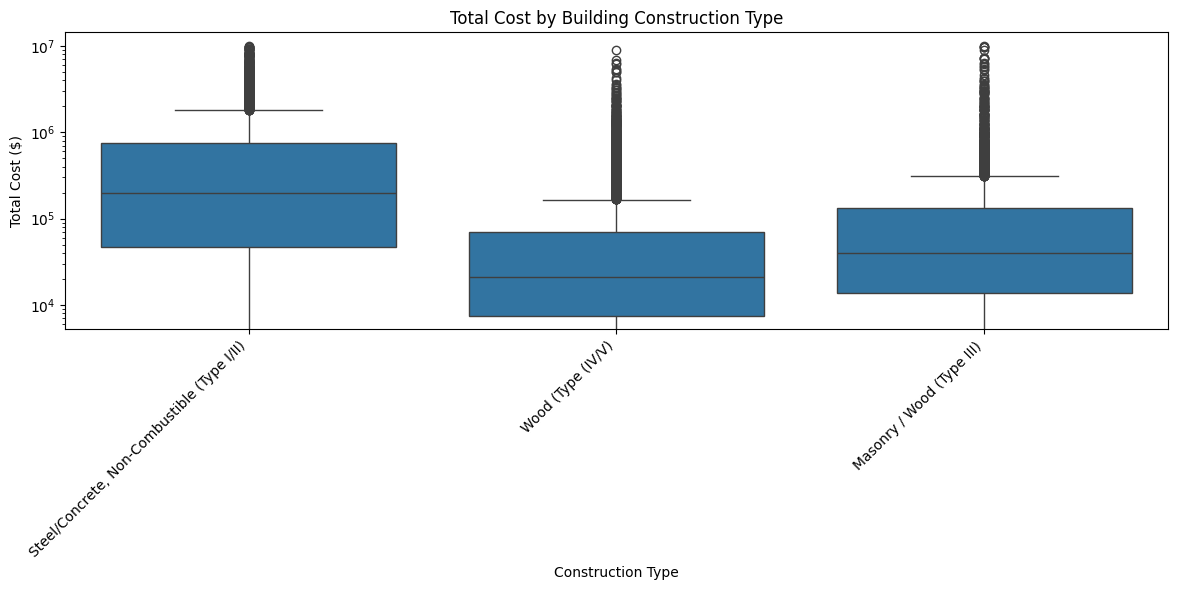

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='building_construction_type', y='calc_total_cost', 
            data=df[df['building_construction_type'].isin(type_counts.index)])
plt.title('Total Cost by Building Construction Type')
plt.xlabel('Construction Type')
plt.ylabel('Total Cost ($)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()